<a id="intro"></a>
# Анализ сервиса для чтения книг по подписке

**Описание проекта**

Заказчики — отдел маркетинга крупного сервиса для чтения книг по подписке. Они планируют сформулировать ценностное предложение для нового продукта.

Цели исследования:
- проанализировать базу данных о книгах, издательствах, авторах, пользовательских обзорах и оценках книг
- сделать выводы и рекомендации

**Содержание**:
1. [Общая информация о данных](#general)
2. [Исследовательский анализ](#analyze_data)

 👉 **[Итоги исследования](#research_results)**

 
**Описание данных**

**Таблица `books`** - cодержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `publication_date` — дата публикации книги;
- `publisher_id` — идентификатор издателя.

**Таблица `authors`** - cодержит данные об авторах:
- `author_id` — идентификатор автора;
- `author` — имя автора.

**Таблица `publishers`** - cодержит данные об издательствах:
- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства;

**Таблица `ratings`** - cодержит данные о пользовательских оценках книг:
- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

**Таблица `reviews`** - cодержит данные о пользовательских обзорах:
- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя автора обзора;
- `text` — текст обзора.

**Схема данных**

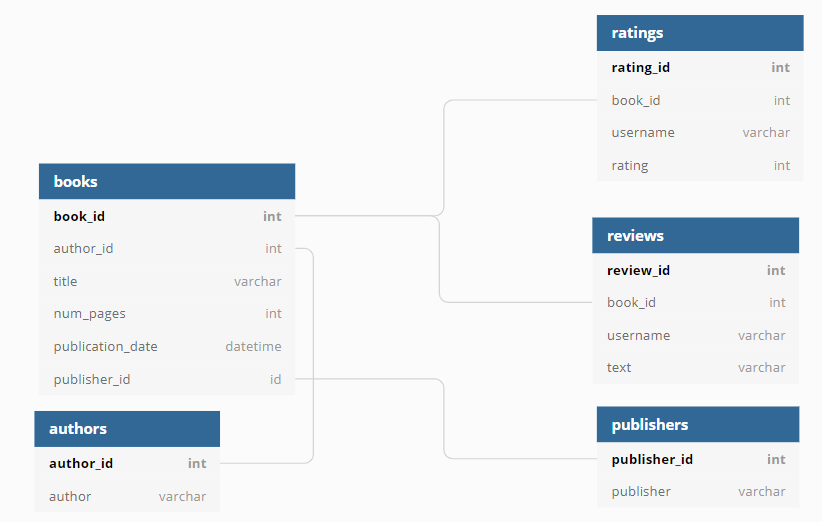

<a id="general"></a>
## Общая информация о данных

In [1]:
# импорт библиотек
import pandas as pd
import sys
from IPython.display import display, Markdown
try:
    import sqlalchemy as sa
except ImportError:
    !"{sys.executable}" -m pip install SQLAlchemy
    import sqlalchemy as sa

In [2]:
# проверка на возможность выполнения Markdown
if 'ipykernel' in sys.modules:
    flag_md = 1
else:
    flag_md = 0

# увеличение ширины колонок
pd.set_option('display.max_colwidth', 70)

In [3]:
# подключение к БД
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных

# строка для подключения к БД
connection_string = 'postgresql://{user}:{pwd}@{host}:{port}/{db}'.format(**db_config)

# создание движка подключения к базе данных
engine = sa.create_engine(connection_string)

In [4]:
# определение функции для выполнения SQL-запросов
def select(sql):
    with engine.connect() as conn:
        return pd.read_sql(sql, conn)  

In [5]:
# таблица о книгах
sql = '''
SELECT *
FROM books
'''
message = f"**Таблица о книгах**"
if flag_md == 1:
    display(Markdown(message))
else:
    print(message.replace("*", ""))
select(sql).info()
select(sql).head()

**Таблица о книгах**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   book_id           1000 non-null   int64 
 1   author_id         1000 non-null   int64 
 2   title             1000 non-null   object
 3   num_pages         1000 non-null   int64 
 4   publication_date  1000 non-null   object
 5   publisher_id      1000 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 47.0+ KB


,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope #1),322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before Columbus,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [6]:
# таблица об авторах
sql = '''
SELECT *
FROM authors
'''
message = f"**Таблица об авторах**"
if flag_md == 1:
    display(Markdown(message))
else:
    print(message.replace("*", ""))
select(sql).info()
select(sql).head()

**Таблица об авторах**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   author_id  636 non-null    int64 
 1   author     636 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.1+ KB


,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [7]:
# таблица об издательствах
sql = '''
SELECT *
FROM publishers
'''
message = f"**Таблица об издательствах**"
if flag_md == 1:
    display(Markdown(message))
else:
    print(message.replace("*", ""))
select(sql).info()
select(sql).head()

**Таблица об издательствах**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   publisher_id  340 non-null    int64 
 1   publisher     340 non-null    object
dtypes: int64(1), object(1)
memory usage: 5.4+ KB


,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [8]:
# таблица о пользовательских оценках книг
sql = '''
SELECT *
FROM ratings
'''
message = f"**Таблица о пользовательских оценках книг**"
if flag_md == 1:
    display(Markdown(message))
else:
    print(message.replace("*", ""))
select(sql).info()
select(sql).head()

**Таблица о пользовательских оценках книг**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6456 entries, 0 to 6455
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rating_id  6456 non-null   int64 
 1   book_id    6456 non-null   int64 
 2   username   6456 non-null   object
 3   rating     6456 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 201.9+ KB


,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [9]:
# таблица о пользовательских обзорах
sql = '''
SELECT *
FROM reviews
'''
message = f"**Таблица о пользовательских обзорах**"
if flag_md == 1:
    display(Markdown(message))
else:
    print(message.replace("*", ""))
select(sql).info()
select(sql).head()

**Таблица о пользовательских обзорах**

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2793 entries, 0 to 2792
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review_id  2793 non-null   int64 
 1   book_id    2793 non-null   int64 
 2   username   2793 non-null   object
 3   text       2793 non-null   object
dtypes: int64(2), object(2)
memory usage: 87.4+ KB


,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. Over provide race te...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Among admit investment ...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but person sport treatme...
3,4,3,johnsonamanda,Finally month interesting blue could nature cultural bit. Prepare ...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List dinner another whol...


<div style="border:solid gray 1px; padding: 20px">

**Выводы:**

1. В базе данных есть информация:
   - о **1000** книг
   - о **636** авторах
   - о **340** издательствах
   - о **6456** пользовательских оценках книг
   - о **2793** пользовательских обзорах
2. Нет пропущенных значений

3. У поля `publication_date` таблицы `books` строковый тип данных, необходимо учесть при написании запросов

<a id="analyze_data"></a>
## Исследовательский анализ данных

### Количество книг, опубликованных после 1 января 2000 года

In [10]:
# таблица о пользовательских обзорах
sql = '''
SELECT COUNT(*) AS num_books
FROM books
WHERE CAST(publication_date AS date) > '2000-01-01'
'''
message = f"После 1 января 2000 года, опубликовано **{select(sql).loc[0,'num_books']}** книг"
if flag_md == 1:
    display(Markdown(message))
else:
    print(message.replace("*", ""))

После 1 января 2000 года, опубликовано **819** книг

<div style="border:solid gray 1px; padding: 20px">

**Вывод:**

**82%** книг в количестве **819 шт** было опубликовано начиная со 2 января 2000 года

### Количество обзоров и средняя оценка для каждой книги

Отсортируем книги по убыванию количества обзоров.

In [28]:
sql = '''
SELECT b.book_id,
       b.title,
       COUNT(DISTINCT r.review_id) AS review_count,
       AVG(rt.rating) AS rating_avg
FROM books b
LEFT JOIN reviews r ON b.book_id = r.book_id
LEFT JOIN ratings rt ON b.book_id = rt.book_id
GROUP BY b.book_id,
         b.title
ORDER BY review_count DESC
'''
message = f"**Книги по убыванию количества уникальных обзоров**"
if flag_md == 1:
    display(Markdown(message))
else:
    print(message.replace("*", ""))
select(sql)

**Книги по убыванию количества уникальных обзоров**

,book_id,title,review_count,rating_avg
0,948,Twilight (Twilight #1),7,3.662500
1,963,Water for Elephants,6,3.977273
2,734,The Glass Castle,6,4.206897
3,302,Harry Potter and the Prisoner of Azkaban (Harry Potter #3),6,4.414634
4,695,The Curious Incident of the Dog in the Night-Time,6,4.081081
...,...,...,...,...
995,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.666667
996,808,The Natural Way to Draw,0,3.000000
997,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.000000
998,221,Essential Tales and Poems,0,4.000000


<div style="border:solid gray 1px; padding: 20px">

**Выводы**
1. Самая популярная книга по количеству уникальных обзоров **Twilight (Twilight #1)**

2. Несмотря на большое количество уникальных обзоров, у Twilight (Twilight #1) невысокий средний рейтинг - вероятно существуют разногласия среди читателей

### Издательство, выпустившее наибольшее число книг

Определим издательство, которое выпустило наибольшее число книг толще 50 страниц — исключим из анализа брошюры.

In [12]:
sql = '''
SELECT publisher,
       COUNT(b.book_id) AS book_count
FROM publishers
JOIN books b USING(publisher_id)
WHERE b.num_pages > 50
GROUP BY publisher_id
ORDER BY book_count DESC
LIMIT 1
'''
message = f"**Издательство, выпустившее наибольшее число книг толще 50 страниц**"
if flag_md == 1:
    display(Markdown(message))
else:
    print(message.replace("*", ""))
select(sql).head()

**Издательство, выпустившее наибольшее число книг толще 50 страниц**

,publisher,book_count
0,Penguin Books,42


<div style="border:solid gray 1px; padding: 20px">

**Вывод:**

1. Британское издательство Penguin Books выпустило **42** книги, содержащие более 50 страниц

### Автор с самой высокой средней оценкой книг

Определим автора с самой высокой средней оценкой книг. Учтем только книги с 50 и более оценками.

In [13]:
sql = '''
WITH a_r AS
  (SELECT rt.book_id,
          rt.rating,
          b.author_id,
          a.author
   FROM ratings rt
   LEFT JOIN books b ON rt.book_id=b.book_id
   LEFT JOIN authors a ON b.author_id=a.author_id
   WHERE rt.book_id IN
       (SELECT book_id
        FROM ratings
        GROUP BY book_id
        HAVING COUNT(rating_id) >= 50))
SELECT author,
       AVG(rating) AS rating_avg
FROM a_r
GROUP BY author_id,
         author
ORDER BY rating_avg DESC
LIMIT 1
'''
message = f"**Автор с самой высокой средней оценкой книг**"
if flag_md == 1:
    display(Markdown(message))
else:
    print(message.replace("*", ""))
select(sql).head()

**Автор с самой высокой средней оценкой книг**

,author,rating_avg
0,J.K. Rowling/Mary GrandPré,4.287097


<div style="border:solid gray 1px; padding: 20px">

**Вывод:**

1. У автора серии книг о Гарри Поттере **J.K. Rowling** самая высокая средня оценка книг **4,29**

### Среднее количество обзоров от пользователей

Посчитаем среднее количество обзоров от пользователей, которые поставили больше 48 оценок

In [14]:
sql = '''
WITH rt_r AS
  (SELECT rt.username,
          r.review_count
   FROM ratings rt
   LEFT JOIN
     (SELECT username,
             COUNT(review_id) AS review_count
      FROM reviews
      GROUP BY username) r ON rt.username = r.username
   GROUP BY rt.username,
            r.review_count
   HAVING COUNT(rt.rating_id) > 48)
SELECT AVG(review_count) AS review_count_avg
FROM rt_r
'''
message = f"Среднее количество обзоров: **{select(sql).loc[0,'review_count_avg']}**"
if flag_md == 1:
    display(Markdown(message))
else:
    print(message.replace("*", ""))

Среднее количество обзоров: **24.0**

<div style="border:solid gray 1px; padding: 20px">

**Вывод**
1. В среднем **24** обзора пишут пользователи с количеством оценок более **48**

<a id="research_results"></a>
## Итоги исследования

Результаты исследования помогут отделу маркетинга сформулировать ценностное предложение для нового продукта.

1. **82%** книг в количестве **819** шт было опубликовано начиная со 2 января 2000 года

2. Книги по количеству обзоров:
   - на первом месте Twilight (Twilight #1)
   - Несмотря на большое количество уникальных обзоров, у Twilight (Twilight #1) невысокий средний рейтинг - вероятно существуют разногласия среди читателей
    
6. Британское издательство Penguin Books выпустило **42** книги, содержащие более 50 страниц

8. У автора серии книг о Гарри Поттере **J.K. Rowling** самая высокая средня оценка книг **4,29**

7. В среднем **24** обзора пишут активные пользователи с количеством оценок более **48**

[Вернуться в начало](#intro)